# 📕 TP CNN

## 🚚 Importation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from sklearn import metrics

### 📍 Informatiosn sur le dataset

Infos sur le jeu d'apprentissage : 
------------------------------------
Type : <class 'numpy.ndarray'>
Dimensions : (60000, 28, 28)
Premier élément : 


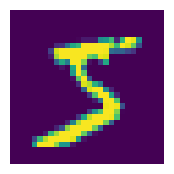

In [3]:
# Charger les données
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Informations sur le dataset
print(f'Infos sur le jeu d\'apprentissage : ')
print(f'------------------------------------')
print(f'Type : {type(x_train)}')
print(f'Dimensions : {x_train.shape}')

# Affichage du premier élément
print(f'Premier élément : ')
plt.figure(figsize=(2, 2))
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

### 📍 Afficher les 32 premiers éléments

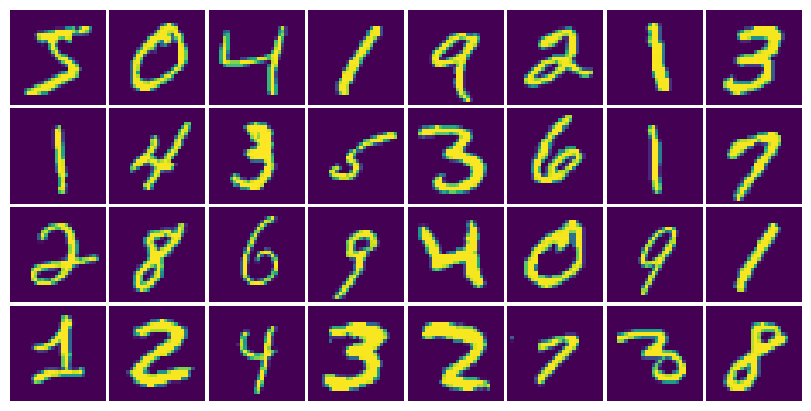

In [4]:
rows = 4
images_per_row = 8

plt.figure(figsize=(images_per_row, rows))

for i in range(32):
    plt.subplot(rows, images_per_row, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')

plt.tight_layout(pad=0.3)
plt.show()

### 📍 Normaliser les données

`Normaliser` les données consiste à mettre entre 0 et 1

In [5]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train, x_test = x_train / 255.0, x_test / 255.0

En normalisant les données, on constate que les dimensions ont changé. En effet il y a une `4ème dimension`

Infos sur le jeu d'apprentissage : 
------------------------------------
Type : <class 'numpy.ndarray'>
Dimensions : (60000, 28, 28, 1)
Premier élément : 


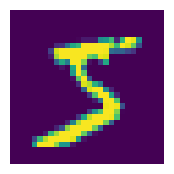

In [6]:
# Informations sur le dataset
print(f'Infos sur le jeu d\'apprentissage : ')
print(f'------------------------------------')
print(f'Type : {type(x_train)}')
print(f'Dimensions : {x_train.shape}')

# Affichage du premier élément
print(f'Premier élément : ')
plt.figure(figsize=(2, 2))
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

## 🌐 Mise en place d'un CNN

- Convolution
  - On va passer `32 filtres` de taille 3 x 3
  - Pour la première on fournit la `taille` de nos inputs : ici 28 x 28
- Pooling
- Flatten
  - La méthode Dense ne prend pas des tableaux à plusieurs dimensions.
  - Flatten permet don `d'applatir` le tableau en une `seule liste`
- Dense
  - Maintenant que nous avons extrait les infos utiles on va construire un `fully-connected'
  - Avec `128 neuronnes` (On peut adapter si besoin)
- Dense
  - Ici il s'agit de la sortie
  - On cherche à déterminer les chiffres entre 0 et 9.
  - Il y a donc uniquement `10 neuronnes` (sortie)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\appas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 🔍 Epoch
Supposons que vous ayez :

- 10 000 exemples de données d’entraînement.
- Vous utilisez un batch size (taille de lot) de 1 000.

Dans ce cas :

- Une epoch signifie que les 10 000 exemples ont été utilisés une fois.
- Le modèle effectuera 10 batches (10 000 / 1 000 = 10) pour compléter une epoch.
- Si vous définissez epochs=5, cela signifie que chaque exemple sera traité 5 fois, à travers 50 batches (5 epochs × 10 batches par epoch).

## 🔍 Validation

- L'échantillon de `validation` est issue du train
- Les performances du modèle ne prennent pas en compte la validation

In [8]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9091 - loss: 0.3146 - val_accuracy: 0.9770 - val_loss: 0.0718
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9835 - loss: 0.0531 - val_accuracy: 0.9870 - val_loss: 0.0533
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9904 - loss: 0.0309 - val_accuracy: 0.9840 - val_loss: 0.0613
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9938 - loss: 0.0205 - val_accuracy: 0.9873 - val_loss: 0.0501
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9954 - loss: 0.0142 - val_accuracy: 0.9863 - val_loss: 0.0570


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Accuracy : {test_acc * 100 :.2f} %')
print(f'Loss : {test_loss * 100 :.2f} %')

313/313 - 0s - 1ms/step - accuracy: 0.9858 - loss: 0.0455
Accuracy : 98.58 %
Loss : 4.55 %


### 📍 Predictions

In [18]:
predict_x = model.predict(x_test)
pred = np.argmax(predict_x, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
pd.DataFrame(predict_x)

,0,1,2,3,4,5,6,7,8,9
0,3.645855e-09,1.501828e-07,9.153738e-07,9.128260e-06,2.808111e-11,9.906034e-10,2.333704e-12,9.999896e-01,2.877248e-08,1.236956e-07
1,8.123962e-09,1.464170e-05,9.999853e-01,3.610037e-09,1.192541e-13,6.824336e-14,9.213279e-09,2.682616e-11,1.117532e-08,4.117759e-10
2,2.755404e-07,9.999882e-01,2.667768e-07,6.055313e-10,3.233712e-07,1.173474e-08,2.214284e-08,6.496527e-06,4.345345e-06,1.152275e-08
3,9.999883e-01,6.882007e-09,4.725881e-07,9.205595e-09,7.008069e-10,4.667491e-09,1.018218e-05,4.288493e-09,3.464586e-08,1.049605e-06
4,1.110503e-08,9.691392e-09,6.581995e-09,1.729417e-09,9.999813e-01,8.020092e-11,6.215398e-09,3.125887e-10,3.846622e-07,1.835797e-05
...,...,...,...,...,...,...,...,...,...,...
9995,2.813703e-12,2.232835e-07,9.999957e-01,3.386395e-08,9.111763e-18,2.378088e-18,9.940123e-18,3.582512e-06,4.492078e-07,2.123805e-12
9996,1.981754e-12,2.952739e-11,8.767307e-08,9.999902e-01,1.185191e-16,6.813954e-10,5.686414e-17,2.312707e-11,9.268346e-10,9.678054e-06
9997,1.423468e-15,1.414681e-09,4.227971e-12,1.250018e-10,9.999998e-01,5.860845e-10,2.964062e-12,2.880555e-08,3.045509e-08,2.283454e-07
9998,3.773236e-10,9.411355e-11,4.804577e-11,1.479081e-07,5.263239e-13,9.995368e-01,2.302082e-07,5.310035e-10,4.629361e-04,7.956181e-09


<Axes: >

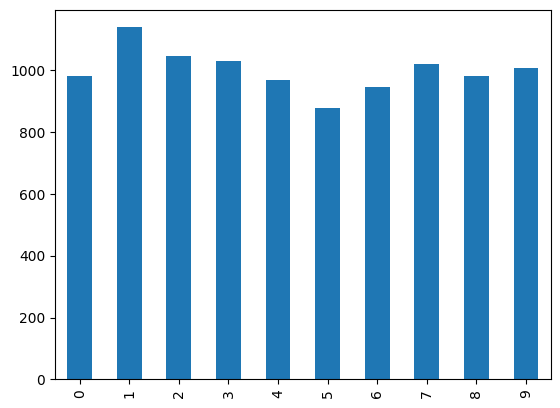

In [27]:
pd.Series(pred).value_counts().sort_index().plot.bar()

In [28]:
print(metrics.confusion_matrix(y_test, pred))

[[ 972    1    1    2    0    0    2    0    2    0]
 [   0 1128    2    3    0    0    0    0    2    0]
 [   1    0 1021    0    0    0    0    7    3    0]
 [   0    0    1 1006    0    1    0    0    2    0]
 [   0    2    3    1  963    0    0    1    2   10]
 [   1    0    1   11    0  871    3    0    3    2]
 [   5    2    0    1    2    3  941    0    4    0]
 [   0    2   11    2    0    0    0 1008    1    4]
 [   3    0    3    4    0    1    0    2  959    2]
 [   1    4    3    1    3    2    0    1    5  989]]


In [29]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [30]:
print(f'Taux erreur : {1 - metrics.accuracy_score(y_test, pred):.4f}')

Taux erreur : 0.0142


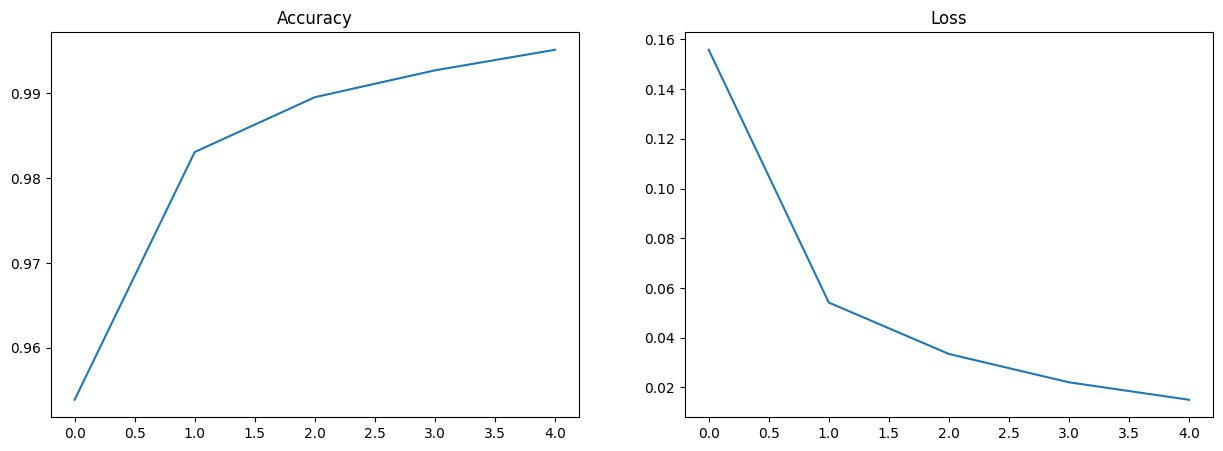

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()

In [32]:
# Récupérer les poids
conv1_weights = model.layers[0].get_weights()
conv1_weights[0].shape

(3, 3, 1, 32)

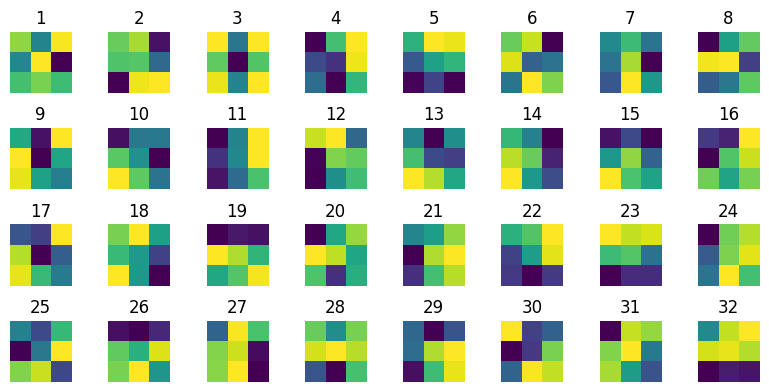

In [34]:
rows = 4
images_per_row = 8

plt.figure(figsize=(images_per_row, rows))

for i in range(32):
    plt.subplot(rows, images_per_row, i + 1)
    plt.title(f'{i + 1}')
    plt.imshow(conv1_weights[0][:, :, 0, i], cmap='viridis')
    plt.axis('off')

plt.tight_layout(pad=1)
plt.show()